In [58]:
import pandas as pd
import glob
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
import numpy as np

In [29]:
path = r'C:\Users\Abhishek\Desktop\GDP1b'

In [30]:
all_files = glob.glob(path+'/*.csv')

In [33]:
li = []
for file in all_files:
    df = pd.read_csv(file,encoding = 'ISO-8859-1')
    df = df[['Item', '2014-15']]
    df = df.T
    df.columns = df.iloc[0]
    df = df[1:]
    df['State'] = file.split('\\')[-1].split('-')[1]
    li.append(df)

In [46]:
df = pd.concat(li, axis = 0, ignore_index=True, sort=True)

In [47]:
df['State']

0        Andhra_Pradesh
1     Arunachal_Pradesh
2                 Assam
3                 Bihar
4            Chandigarh
5          Chhattisgarh
6                 Delhi
7                   Goa
8               Gujarat
9               Haryana
10     Himachal_Pradesh
11            Jharkhand
12            Karnataka
13               Kerala
14       Madhya_Pradesh
15          Maharashtra
16              Manipur
17            Meghalaya
18              Mizoram
19             Nagaland
20               Odisha
21           Puducherry
22               Punjab
23            Rajasthan
24               Sikkim
25           Tamil_Nadu
26            Telangana
27              Tripura
28          Uttarakhand
29        Uttar_Pradesh
Name: State, dtype: object

In [48]:
df_filtered = df[(df['State'] != 'Delhi') & (df['State'] != 'Puducherry') & (df['State'] != 'Chandigarh')]
df_filtered['State']

0        Andhra_Pradesh
1     Arunachal_Pradesh
2                 Assam
3                 Bihar
5          Chhattisgarh
7                   Goa
8               Gujarat
9               Haryana
10     Himachal_Pradesh
11            Jharkhand
12            Karnataka
13               Kerala
14       Madhya_Pradesh
15          Maharashtra
16              Manipur
17            Meghalaya
18              Mizoram
19             Nagaland
20               Odisha
22               Punjab
23            Rajasthan
24               Sikkim
25           Tamil_Nadu
26            Telangana
27              Tripura
28          Uttarakhand
29        Uttar_Pradesh
Name: State, dtype: object

Filtering out union-territories

In [49]:
df_filtered

,"Agriculture, forestry and fishing",Air transport,Communication & services related to broadcasting,Construction,Crops,"Electricity, gas, water supply & other utility services",Financial services,Fishing and aquaculture,Forestry and logging,Gross State Domestic Product,...,Storage,Subsidies on products,TOTAL GSVA at basic prices,Taxes on Products,Tertiary,Trade & repair services,Trade & repair services*,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Water transport
0,14819416,14900,928756,4664889,7893514,1151729,1900863,2270664,346160,52646842,...,18700,1690800,48825542,5512100,22032942,3716000,NaN,4233400,5076984,94200
1,686117,0,19568,147842,415520,113527,25207,8193,224017,1676119,...,0,30272,1636292,70099,631844,56796,NaN,60421,35203,0
2,3855548,26223,357619,1733568,2890544,296587,543651,529539,261987,19809800,...,10308,582406,18666897,1725309,9307109,2876251,NaN,2987155,1194568,4502
3,7951890,13599,919427,3449763,4688237,345168,1178022,653224,550132,37391988,...,10618,2006421,36184863,3213546,22179969,7081391,NaN,7448373,3147173,2228
5,3948847,9507,294552,2669855,2613371,1198438,739057,385483,597785,23498180,...,16675,1332092,22228481,2601791,7588778,1414164,NaN,1535571,871770,0
7,308507,46359,44028,165819,140421,204110,233618,122201,15744,4063307,...,357,61854,3597882,527279,1738217,343492,NaN,380927,189656,17820
8,1.377e+07,NaN,1.24252e+06,5.52602e+06,9.67109e+06,3.40998e+06,4.60664e+06,638357,761616,8.95027e+07,...,57634,1.98155e+06,7.91311e+07,1.23532e+07,3.02204e+07,1.01787e+07,NaN,1.01787e+07,4.55591e+06,NaN
9,8.01524e+06,NaN,479658,3.70257e+06,4.63673e+06,1.10192e+06,1.67149e+06,110080,352254,4.37462e+07,...,14459,1.06787e+06,3.98284e+07,4.98567e+06,1.92266e+07,4.81778e+06,NaN,4.98632e+06,2.56062e+06,NaN
10,1514981,3979,194266,808256,853758,767268,362521,9968,540950,10436879,...,129,259291,9800853,895317,4133326,494162,NaN,615496,552234,0
11,3211065,6716,323214,1789834,2094466,337489,551441,108947,445149,21710718,...,306,411619,19623166,2499171,8133341,1840196,NaN,1991359,1470022,0


In [60]:
df_GDP_per_capita = df_filtered[['Per Capita GSDP (Rs.)', 'State']]
df_GDP_per_capita.sort_values(by=['Per Capita GSDP (Rs.)'])

,Per Capita GSDP (Rs.),State
3,33954,Bihar
29,49450,Uttar_Pradesh
16,58442,Manipur
2,60621,Assam
11,62091,Jharkhand
14,62989,Madhya_Pradesh
20,73979,Odisha
17,76228,Meghalaya
27,77358,Tripura
23,84837,Rajasthan


In [55]:
GDP_list = df_GDP_per_capita['Per Capita GSDP (Rs.)'].tolist()
state_list = df_GDP_per_capita['State'].tolist()

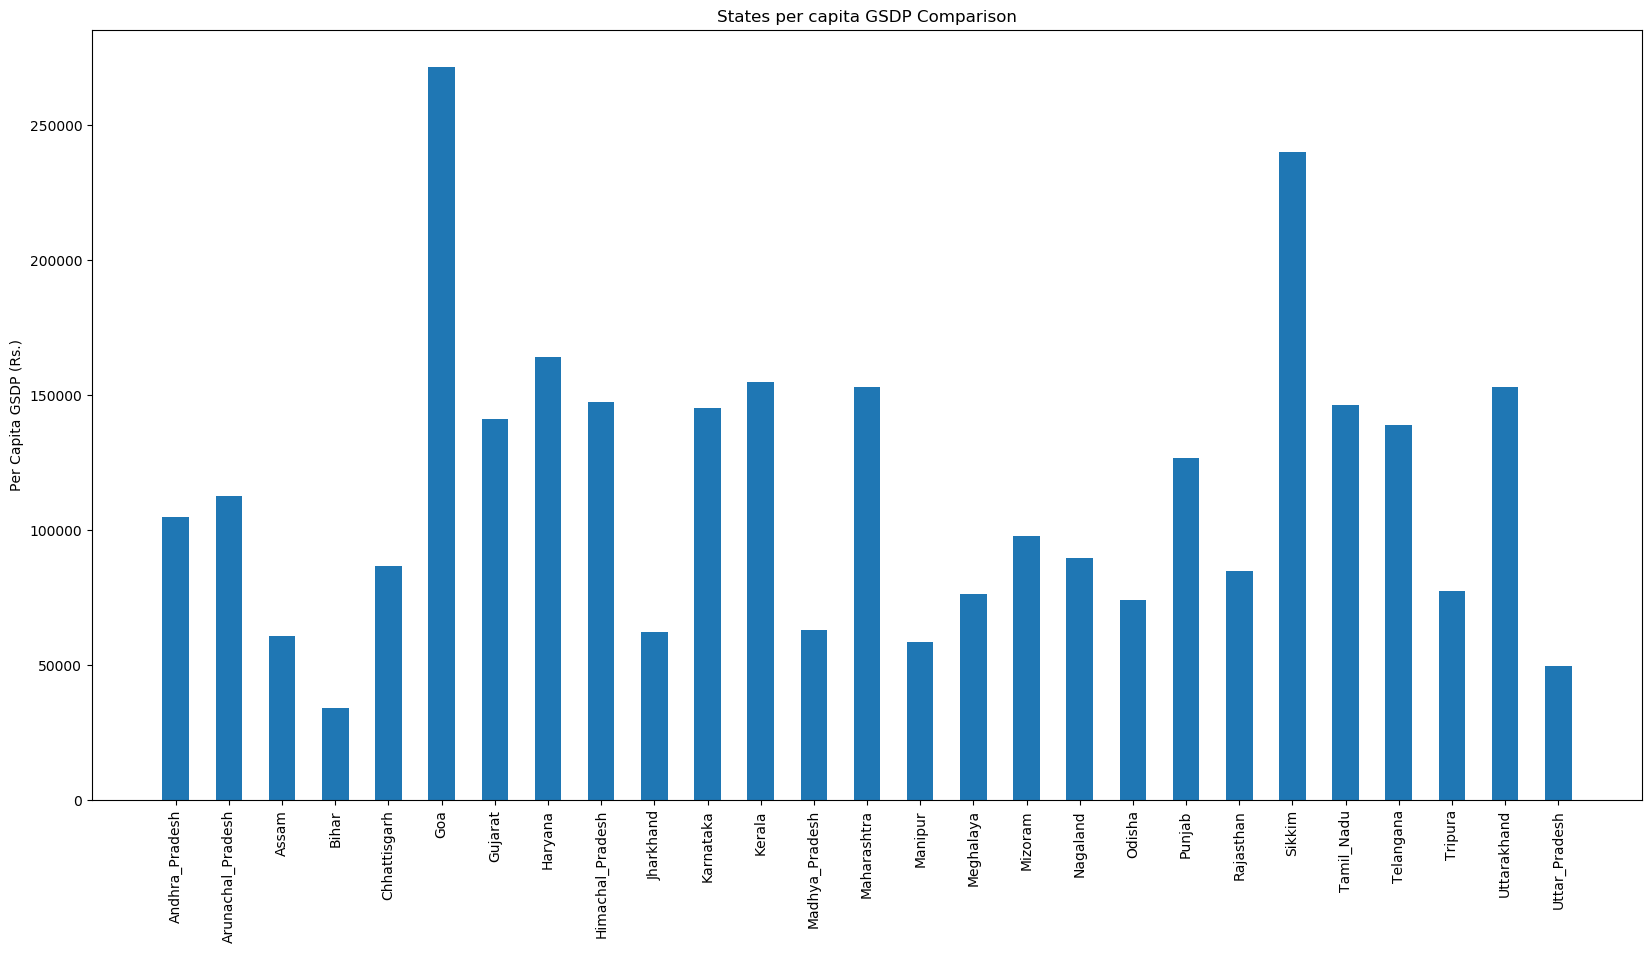

In [223]:
objects = state_list
y_pos = np.arange(len(objects))
performance = GDP_list

plt.figure(figsize=(20, 10))  # width:20, height:3
plt.bar(y_pos, performance, align='center', width=0.5)


plt.xticks(y_pos, objects,rotation='vertical')
plt.ylabel('Per Capita GSDP (Rs.)')
plt.title('States per capita GSDP Comparison')

plt.show()

# Identify the top 5 and the bottom 5 states based on the GDP per capita.

From the above graph we can conclude that Goa, Sikkim, Haryana, Kerela and Uttarakhand are the top 5 states whereas Bihar, UP, Manipur, Assam and Jharkhand are the bottom 5 states

# Find the ratio of the highest per capita GDP to the lowest per capita GDP.    

In [66]:
df_GDP_per_capita['Per Capita GSDP (Rs.)'].max()/df_GDP_per_capita['Per Capita GSDP (Rs.)'].min()

8.004741709371503

In [67]:
list(df_filtered.columns)

['Agriculture, forestry and fishing',
 'Air transport',
 'Communication & services related to broadcasting',
 'Construction',
 'Crops',
 'Electricity, gas, water supply & other utility services',
 'Financial services',
 'Fishing and aquaculture',
 'Forestry and logging',
 'Gross State Domestic Product',
 'Hotels & restaurants',
 'Livestock',
 'Manufacturing',
 'Mining and quarrying',
 'Other services',
 'Per Capita GSDP (Rs.)',
 "Population ('00)",
 'Primary',
 'Public administration',
 'Railways',
 'Real estate, ownership of dwelling & professional services',
 'Road transport',
 'Road transport*',
 'Road transport**',
 'Secondary',
 'Services incidental to transport',
 'Services incidental to transport*',
 'State',
 'Storage',
 'Subsidies on products',
 'TOTAL GSVA at basic prices',
 'Taxes on Products',
 'Tertiary',
 'Trade & repair services',
 'Trade & repair services*',
 'Trade, repair, hotels and restaurants',
 'Transport, storage, communication & services related to broadcasting'

In [68]:
df_filtered['% contribution Primary'] = 100 * (df_filtered['Primary']/df_filtered['Gross State Domestic Product'])
df_filtered['% contribution Secondary'] = 100 * (df_filtered['Secondary']/df_filtered['Gross State Domestic Product'])
df_filtered['% contribution Tertiary'] = 100 * (df_filtered['Tertiary']/df_filtered['Gross State Domestic Product'])

C:\Anaconda\envs\textsumm\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda\envs\textsumm\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda\envs\textsumm\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pand

In [71]:
contribution_df = df_filtered[['% contribution Primary', '% contribution Secondary', '% contribution Tertiary', 'Gross State Domestic Product', 'State']]
contribution_df

,% contribution Primary,% contribution Secondary,% contribution Tertiary,Gross State Domestic Product,State
0,30.9681,19.9231,41.8505,52646842,Andhra_Pradesh
1,42.7749,17.1521,37.6968,1676119,Arunachal_Pradesh
2,26.8892,20.3591,46.9823,19809800,Assam
3,21.4484,16.0058,59.3174,37391988,Bihar
5,27.2396,35.0618,32.2952,23498180,Chhattisgarh
7,7.68165,38.0856,42.7784,4063307,Goa
8,17.7505,36.8967,33.7648,8.95027e+07,Gujarat
9,18.3797,28.7143,43.9503,4.37462e+07,Haryana
10,14.8355,39.4674,39.6031,10436879,Himachal_Pradesh
11,24.174,28.7483,37.4623,21710718,Jharkhand


# Which plot will you use here? Why?
We can easily see the contribution of each sector in the states GDP using the bar graph

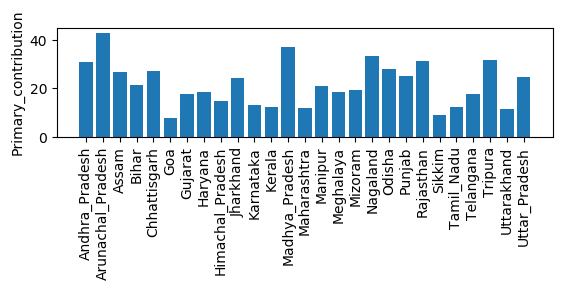

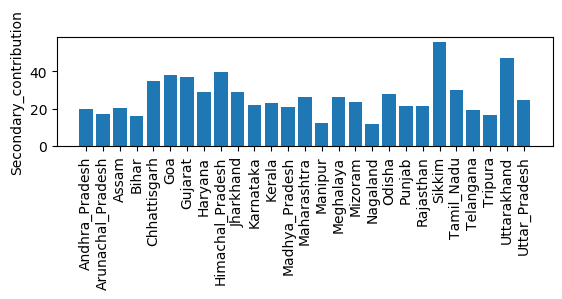

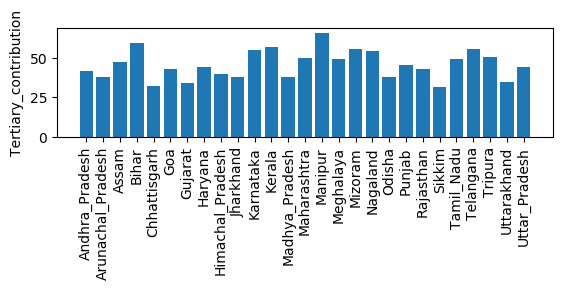

In [83]:
x = range(27)
plt.subplot(3,1,1)
pop = plt.bar(x, contribution_df['% contribution Primary'])
plt.ylabel('Primary_contribution')
plt.xticks(x, contribution_df['State'], rotation='vertical')
plt.show()
plt.subplot(3,1,2)
pop = plt.bar(x, contribution_df['% contribution Secondary'])
plt.ylabel('Secondary_contribution')
plt.xticks(x, contribution_df['State'], rotation='vertical')
plt.show()
plt.subplot(3,1,3)
pop = plt.bar(x, contribution_df['% contribution Tertiary'])
plt.ylabel('Tertiary_contribution')
plt.xticks(x, contribution_df['State'], rotation='vertical')
plt.show()

# Why is (Primary + Secondary + Tertiary) not equal to total GDP?
It is because the sum of the tree gives us TOTAL GSVA at basic prices on which Taxes on Products are added and Subsidies on products are substracted which gives the total GDP

# Can you draw any insight from this? Find correlation of percentile of the state (% of states with lower per capita GDP) and %contribution of Primary sector to total GDP.

In [89]:
corelation_df = df_filtered[['pct_rank_GDP', '% contribution Primary']]
corelation_df

,pct_rank_GDP,% contribution Primary
0,0.518519,30.9681
1,0.555556,42.7749
2,0.148148,26.8892
3,0.037037,21.4484
5,0.407407,27.2396
7,1.000000,7.68165
8,0.666667,17.7505
9,0.925926,18.3797
10,0.777778,14.8355
11,0.185185,24.174


In [92]:
corelation_df['pct_rank_GDP'].astype('float64').corr(corelation_df['% contribution Primary'].astype('float64'))

-0.6200221914219157

In [94]:
df_q = df_filtered['Per Capita GSDP (Rs.)'].quantile([0.20,0.5, 0.85, 1])

In [95]:
df_q

0.20     65187
0.50    104977
0.85    153246
1.00    271793
Name: Per Capita GSDP (Rs.), dtype: object

In [136]:
list1=[]
for columnData in df_filtered['Per Capita GSDP (Rs.)'].iteritems():
    if (columnData[1] <= 271793 and columnData[1]>153246):
        list1.append('C1')
        #print('C1',columnData[1])
    elif (columnData[1] <= 153246 and columnData[1]>104977):
        list1.append('C2')
        #print('C2',columnData[1])
    elif (columnData[1] <= 104977 and columnData[1]>65187):
        list1.append('C3')
        #print('C3',columnData[1])
    elif (columnData[1] < 65187):
        list1.append('C4')
        #print('C4',columnData[1])

In [147]:
df_filtered = df_filtered.reset_index(drop=True)
df_filtered['Category'] = pd.DataFrame(list1)

In [149]:
c1_df = df_filtered[df_filtered.Category == 'C1']
c2_df = df_filtered[df_filtered.Category == 'C2']
c3_df = df_filtered[df_filtered.Category == 'C3']
c4_df = df_filtered[df_filtered.Category == 'C4']

In [156]:
list(c1_df.columns)

['Agriculture, forestry and fishing',
 'Air transport',
 'Communication & services related to broadcasting',
 'Construction',
 'Crops',
 'Electricity, gas, water supply & other utility services',
 'Financial services',
 'Fishing and aquaculture',
 'Forestry and logging',
 'Gross State Domestic Product',
 'Hotels & restaurants',
 'Livestock',
 'Manufacturing',
 'Mining and quarrying',
 'Other services',
 'Per Capita GSDP (Rs.)',
 "Population ('00)",
 'Primary',
 'Public administration',
 'Railways',
 'Real estate, ownership of dwelling & professional services',
 'Road transport',
 'Road transport*',
 'Road transport**',
 'Secondary',
 'Services incidental to transport',
 'Services incidental to transport*',
 'State',
 'Storage',
 'Subsidies on products',
 'TOTAL GSVA at basic prices',
 'Taxes on Products',
 'Tertiary',
 'Trade & repair services',
 'Trade & repair services*',
 'Trade, repair, hotels and restaurants',
 'Transport, storage, communication & services related to broadcasting'

In [159]:
c1_df = c1_df[['Agriculture, forestry and fishing', 'Mining and quarrying', 'Manufacturing', 'Electricity, gas, water supply & other utility services', 'Construction', 'Trade, repair, hotels and restaurants', 'Transport, storage, communication & services related to broadcasting', 'Financial services', 'Real estate, ownership of dwelling & professional services', 'Public administration', 'Other services', 'Per Capita GSDP (Rs.)', 'Gross State Domestic Product']]

In [160]:
c1_df

,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Per Capita GSDP (Rs.),Gross State Domestic Product
5,308507,3622,1177608,204110,165819,380927,189656,233618,407099,346486,180431,271793,4063307
7,8.01524e+06,25186,7.75692e+06,1.10192e+06,3.70257e+06,4.98632e+06,2.56062e+06,1.67149e+06,6.97018e+06,1.03638e+06,2.00158e+06,164077,4.37462e+07
11,5930617,558824,4273567,482470,7314003,8557345,4020934,2010306,7287633,2068915,5728645,154778,52600230
21,137447,1329,550697,212499,82058,70568,47347,21079,75330,119514,149265,240274,1520933


In [161]:
c1_df['% contribution Agriculture, forestry and fishing'] = 100 * (c1_df['Agriculture, forestry and fishing']/c1_df['Gross State Domestic Product'])
c1_df['% contribution Mining and quarrying'] = 100 * (c1_df['Mining and quarrying']/c1_df['Gross State Domestic Product'])
c1_df['% contribution Manufacturing'] = 100 * (c1_df['Manufacturing']/c1_df['Gross State Domestic Product'])
c1_df['% contribution Electricity, gas, water supply & other utility services'] = 100 * (c1_df['Electricity, gas, water supply & other utility services']/c1_df['Gross State Domestic Product'])
c1_df['% contribution Construction'] = 100 * (c1_df['Construction']/c1_df['Gross State Domestic Product'])
c1_df['% contribution Trade, repair, hotels and restaurants'] = 100 * (c1_df['Trade, repair, hotels and restaurants']/c1_df['Gross State Domestic Product'])
c1_df['% contribution Transport, storage, communication & services related to broadcasting'] = 100 * (c1_df['Transport, storage, communication & services related to broadcasting']/c1_df['Gross State Domestic Product'])
c1_df['% contribution Financial services'] = 100 * (c1_df['Financial services']/c1_df['Gross State Domestic Product'])
c1_df['% contribution Real estate, ownership of dwelling & professional services'] = 100 * (c1_df['Real estate, ownership of dwelling & professional services']/c1_df['Gross State Domestic Product'])
c1_df['% contribution Public administration'] = 100 * (c1_df['Public administration']/c1_df['Gross State Domestic Product'])
c1_df['% contribution Other services'] = 100 * (c1_df['Other services']/c1_df['Gross State Domestic Product'])

C:\Anaconda\envs\textsumm\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda\envs\textsumm\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda\envs\textsumm\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pand

In [173]:
c1_df[c1_df.columns[-11:]]

,"% contribution Agriculture, forestry and fishing",% contribution Mining and quarrying,% contribution Manufacturing,"% contribution Electricity, gas, water supply & other utility services",% contribution Construction,"% contribution Trade, repair, hotels and restaurants","% contribution Transport, storage, communication & services related to broadcasting",% contribution Financial services,"% contribution Real estate, ownership of dwelling & professional services",% contribution Public administration,% contribution Other services
5,7.59251,0.0891392,28.9815,5.02325,4.08089,9.3748,4.66753,5.74945,10.0189,8.52719,4.4405
7,18.3221,0.057573,17.7316,2.51889,8.46375,11.3983,5.85336,3.82087,15.9332,2.36907,4.57544
11,11.2749,1.0624,8.12462,0.917239,13.9049,16.2686,7.64433,3.82186,13.8548,3.93328,10.8909
21,9.03702,0.0873806,36.2078,13.9716,5.39524,4.63978,3.11302,1.38593,4.95288,7.85794,9.81404


In [218]:
value = list(c1_df[c1_df.columns[-11:]].columns)
mean_contribution = c1_df[c1_df.columns[-11:]].mean(axis = 0)
k = mean_contribution.tolist()
mean_contribution

% contribution Agriculture, forestry and fishing                                       11.556637
% contribution Mining and quarrying                                                     0.324123
% contribution Manufacturing                                                           22.761404
% contribution Electricity, gas, water supply & other utility services                  5.607750
% contribution Construction                                                             7.961192
% contribution Trade, repair, hotels and restaurants                                   10.420380
% contribution Transport, storage, communication & services related to broadcasting     5.319560
% contribution Financial services                                                       3.694527
% contribution Real estate, ownership of dwelling & professional services              11.189943
% contribution Public administration                                                    5.671870
% contribution Other services 

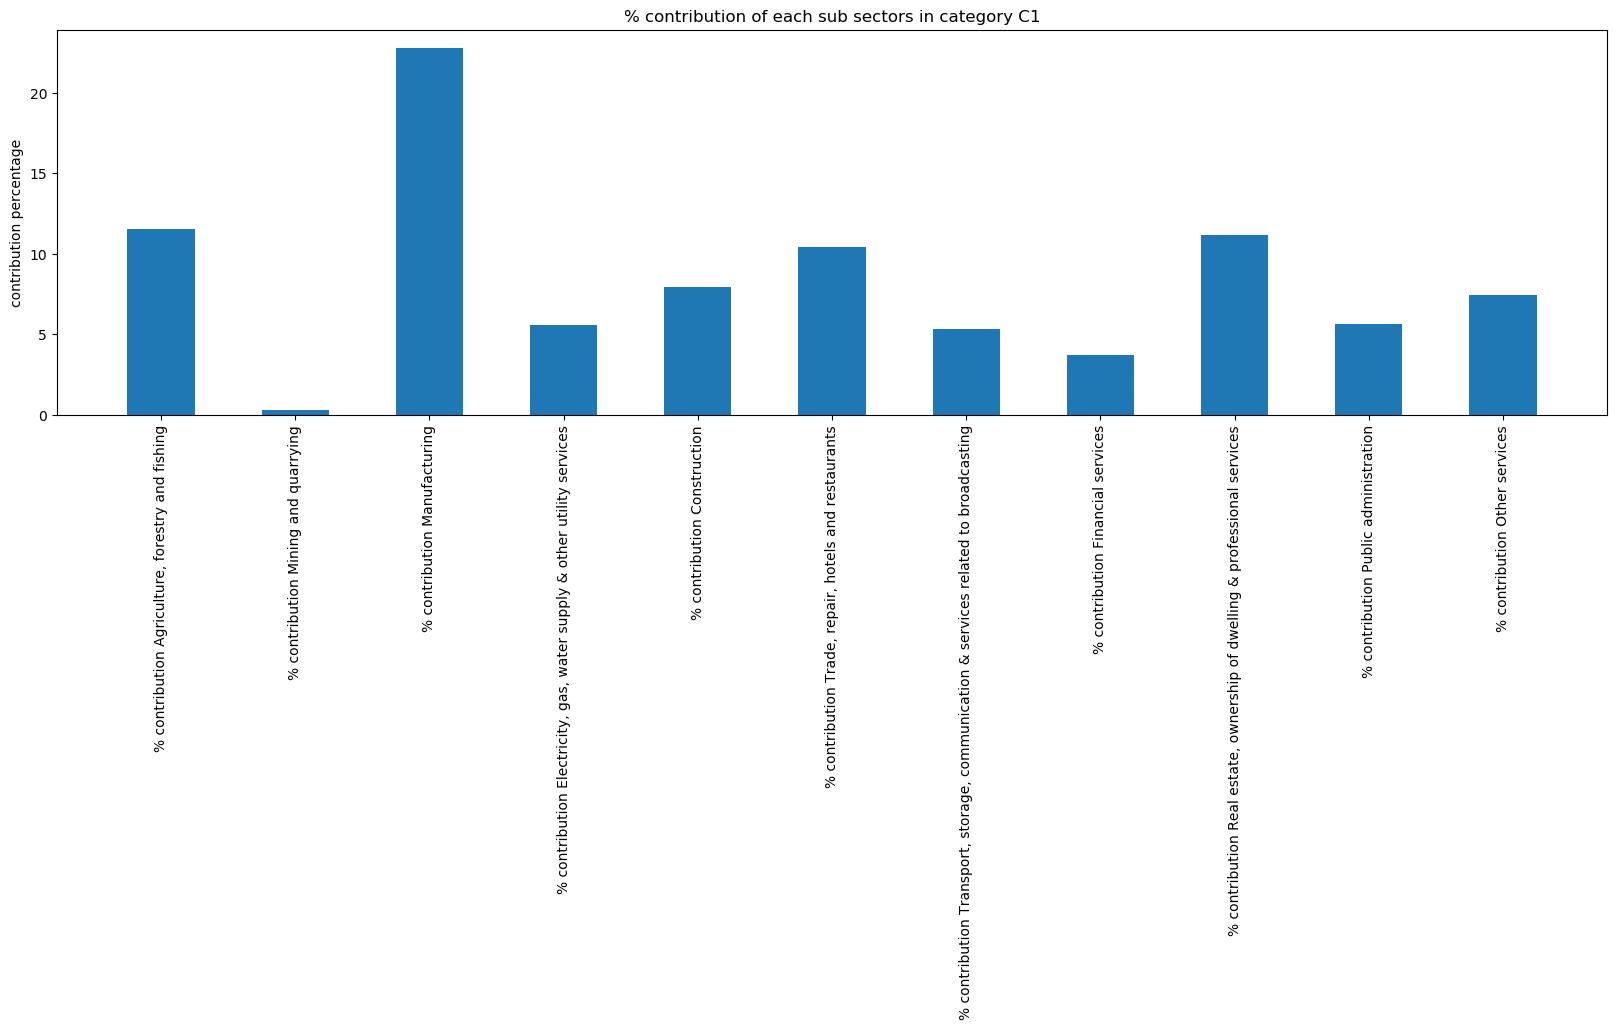

In [219]:
objects = value
y_pos = np.arange(len(objects))
performance = k

plt.figure(figsize=(20, 5))  # width:20, height:3
plt.bar(y_pos, performance, align='center', width=0.5)


plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('contribution percentage')
plt.title('% contribution of each sub sectors in category C1')

plt.show()

In [174]:
c2_df['% contribution Agriculture, forestry and fishing'] = 100 * (c2_df['Agriculture, forestry and fishing']/c2_df['Gross State Domestic Product'])
c2_df['% contribution Mining and quarrying'] = 100 * (c2_df['Mining and quarrying']/c2_df['Gross State Domestic Product'])
c2_df['% contribution Manufacturing'] = 100 * (c2_df['Manufacturing']/c2_df['Gross State Domestic Product'])
c2_df['% contribution Electricity, gas, water supply & other utility services'] = 100 * (c2_df['Electricity, gas, water supply & other utility services']/c2_df['Gross State Domestic Product'])
c2_df['% contribution Construction'] = 100 * (c2_df['Construction']/c2_df['Gross State Domestic Product'])
c2_df['% contribution Trade, repair, hotels and restaurants'] = 100 * (c2_df['Trade, repair, hotels and restaurants']/c2_df['Gross State Domestic Product'])
c2_df['% contribution Transport, storage, communication & services related to broadcasting'] = 100 * (c2_df['Transport, storage, communication & services related to broadcasting']/c2_df['Gross State Domestic Product'])
c2_df['% contribution Financial services'] = 100 * (c2_df['Financial services']/c2_df['Gross State Domestic Product'])
c2_df['% contribution Real estate, ownership of dwelling & professional services'] = 100 * (c2_df['Real estate, ownership of dwelling & professional services']/c2_df['Gross State Domestic Product'])
c2_df['% contribution Public administration'] = 100 * (c2_df['Public administration']/c2_df['Gross State Domestic Product'])
c2_df['% contribution Other services'] = 100 * (c2_df['Other services']/c2_df['Gross State Domestic Product'])

C:\Anaconda\envs\textsumm\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda\envs\textsumm\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda\envs\textsumm\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pand

In [175]:
c2_df[c2_df.columns[-11:]]

,"% contribution Agriculture, forestry and fishing",% contribution Mining and quarrying,% contribution Manufacturing,"% contribution Electricity, gas, water supply & other utility services",% contribution Construction,"% contribution Trade, repair, hotels and restaurants","% contribution Transport, storage, communication & services related to broadcasting",% contribution Financial services,"% contribution Real estate, ownership of dwelling & professional services",% contribution Public administration,% contribution Other services
1,40.9349,1.84008,1.55836,6.77321,8.8205,3.60482,2.10027,1.50389,2.8887,14.5495,13.0497
6,15.385,2.36553,26.9126,3.80992,6.17413,11.3725,5.09025,5.14693,5.78698,2.87834,3.48974
8,14.5157,0.319875,24.3716,7.35151,7.74423,5.89732,5.29118,3.47346,10.7881,5.30785,8.84521
10,12.1714,0.918738,14.053,1.54674,6.62278,9.75458,5.53018,4.44155,26.8678,2.42201,5.75856
13,9.19338,2.94775,18.7824,2.41875,5.2732,8.83818,5.41104,9.00794,17.1406,3.02825,6.02993
19,25.2322,0.028135,13.0168,2.47713,5.98613,12.0103,5.30367,5.59092,8.53993,5.00727,8.97539
22,11.9574,0.243039,17.3123,1.56547,11.1817,11.8033,6.57931,5.12418,15.4043,3.11268,6.80062
23,14.851,3.01628,12.4296,1.40121,5.58323,12.7052,7.05184,5.91522,18.5431,3.34769,8.13461
25,9.88622,1.5097,36.2147,2.67851,8.28923,10.7609,6.58512,2.37694,5.13199,3.57692,6.06493


In [216]:
value = list(c2_df[c2_df.columns[-11:]].columns)
mean_contribution = c2_df[c2_df.columns[-11:]].mean(axis = 0)
k = mean_contribution.tolist()
mean_contribution

% contribution Agriculture, forestry and fishing                                       17.125228
% contribution Mining and quarrying                                                     1.465459
% contribution Manufacturing                                                           18.294596
% contribution Electricity, gas, water supply & other utility services                  3.335828
% contribution Construction                                                             7.297236
% contribution Trade, repair, hotels and restaurants                                    9.638564
% contribution Transport, storage, communication & services related to broadcasting     5.438096
% contribution Financial services                                                       4.731227
% contribution Real estate, ownership of dwelling & professional services              12.343500
% contribution Public administration                                                    4.803392
% contribution Other services 

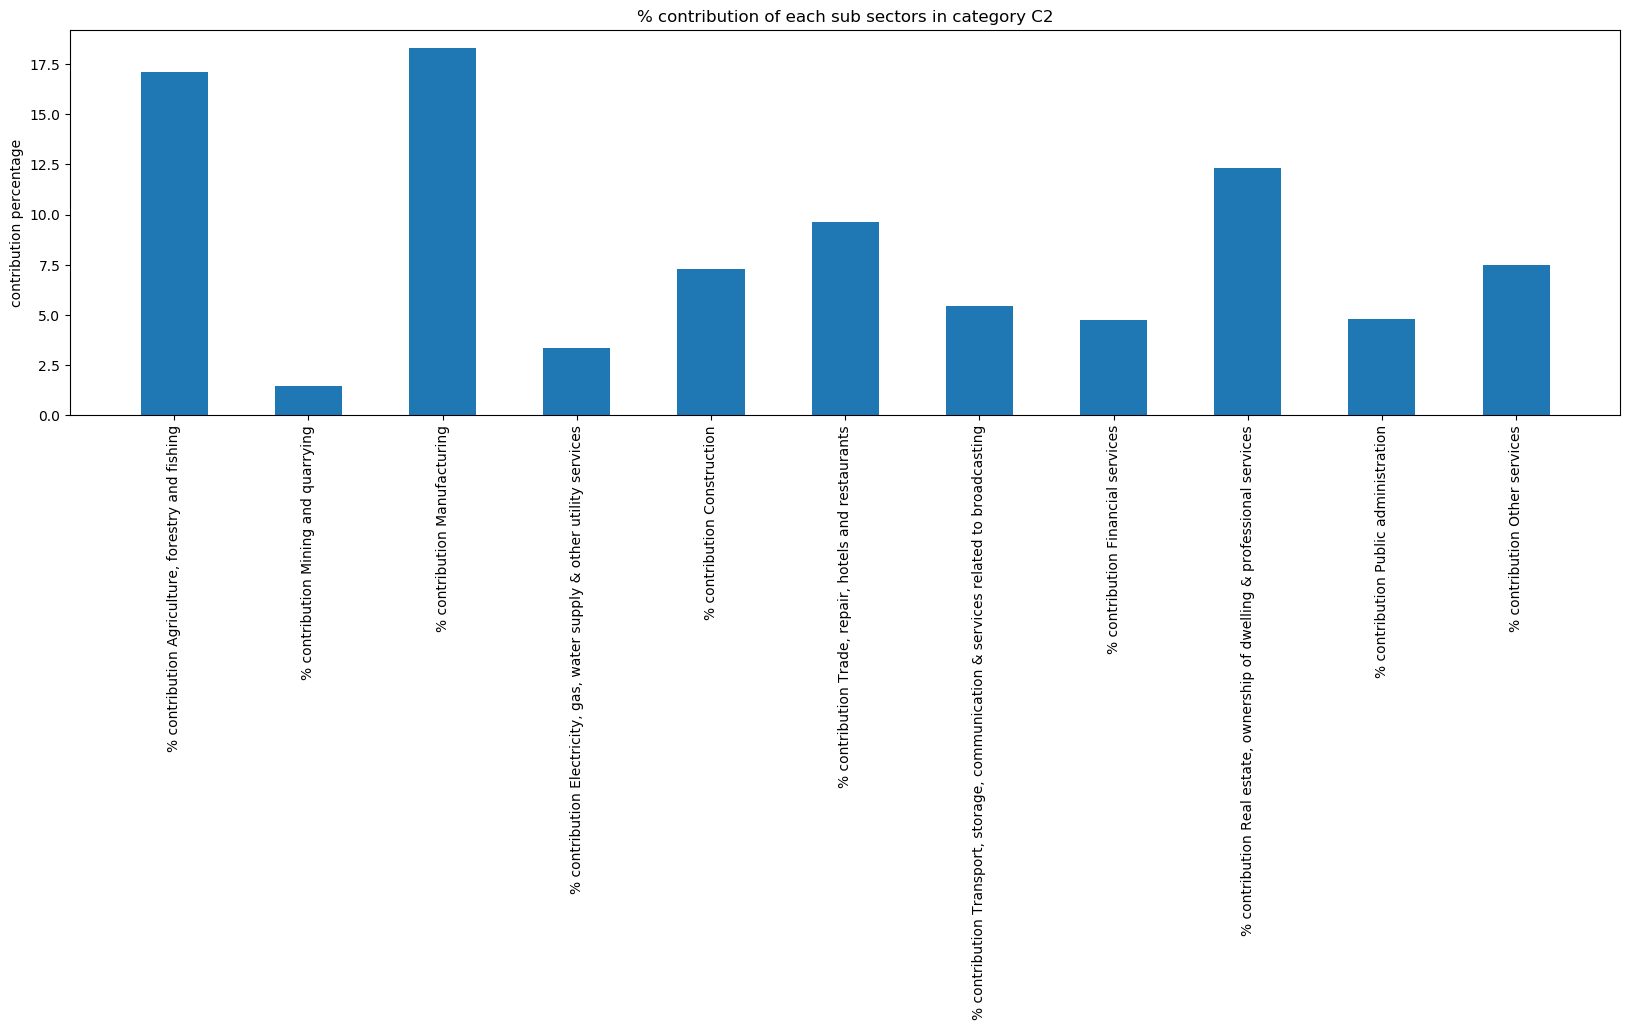

In [217]:
objects = value
y_pos = np.arange(len(objects))
performance = k

plt.figure(figsize=(20, 5))  # width:20, height:3
plt.bar(y_pos, performance, align='center', width=0.5)


plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('contribution percentage')
plt.title('% contribution of each sub sectors in category C2')

plt.show()

In [176]:
c3_df['% contribution Agriculture, forestry and fishing'] = 100 * (c3_df['Agriculture, forestry and fishing']/c3_df['Gross State Domestic Product'])
c3_df['% contribution Mining and quarrying'] = 100 * (c3_df['Mining and quarrying']/c3_df['Gross State Domestic Product'])
c3_df['% contribution Manufacturing'] = 100 * (c3_df['Manufacturing']/c3_df['Gross State Domestic Product'])
c3_df['% contribution Electricity, gas, water supply & other utility services'] = 100 * (c3_df['Electricity, gas, water supply & other utility services']/c3_df['Gross State Domestic Product'])
c3_df['% contribution Construction'] = 100 * (c3_df['Construction']/c3_df['Gross State Domestic Product'])
c3_df['% contribution Trade, repair, hotels and restaurants'] = 100 * (c3_df['Trade, repair, hotels and restaurants']/c3_df['Gross State Domestic Product'])
c3_df['% contribution Transport, storage, communication & services related to broadcasting'] = 100 * (c3_df['Transport, storage, communication & services related to broadcasting']/c3_df['Gross State Domestic Product'])
c3_df['% contribution Financial services'] = 100 * (c3_df['Financial services']/c3_df['Gross State Domestic Product'])
c3_df['% contribution Real estate, ownership of dwelling & professional services'] = 100 * (c3_df['Real estate, ownership of dwelling & professional services']/c3_df['Gross State Domestic Product'])
c3_df['% contribution Public administration'] = 100 * (c3_df['Public administration']/c3_df['Gross State Domestic Product'])
c3_df['% contribution Other services'] = 100 * (c3_df['Other services']/c3_df['Gross State Domestic Product'])

C:\Anaconda\envs\textsumm\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda\envs\textsumm\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda\envs\textsumm\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pand

In [178]:
c3_df[c3_df.columns[-11:]]

,"% contribution Agriculture, forestry and fishing",% contribution Mining and quarrying,% contribution Manufacturing,"% contribution Electricity, gas, water supply & other utility services",% contribution Construction,"% contribution Trade, repair, hotels and restaurants","% contribution Transport, storage, communication & services related to broadcasting",% contribution Financial services,"% contribution Real estate, ownership of dwelling & professional services",% contribution Public administration,% contribution Other services
0,28.1487,2.81935,8.87473,2.18765,8.86072,8.04113,9.64347,3.61059,8.36785,4.18049,8.00692
4,16.8049,10.4347,18.5997,5.10013,11.362,6.53485,3.70995,3.14517,10.4781,3.69383,4.73327
15,15.0164,3.46316,17.7488,2.23176,6.156,15.7314,6.07131,2.62581,6.16227,9.82388,8.77624
16,18.7736,0.74295,0.73352,11.1049,11.5256,9.88941,4.54931,2.00427,4.76394,17.8435,16.1101
17,33.0123,0.449652,0.996294,2.06058,8.47561,7.64522,4.20984,3.27969,8.66997,16.0432,14.0753
18,19.9489,8.0328,17.8719,2.5874,7.46153,9.78211,6.31739,3.30821,7.2948,4.09422,7.26961
20,24.5745,6.64721,10.7034,1.8342,8.74449,11.9199,6.2308,2.98502,10.5391,4.01893,6.80223
24,26.9604,4.7997,7.70647,2.62484,5.9966,13.1603,5.25695,2.90205,6.42823,11.4015,10.8973


In [214]:
value = list(c3_df[c3_df.columns[-11:]].columns)
mean_contribution = c3_df[c3_df.columns[-11:]].mean(axis = 0)
k = mean_contribution.tolist()
mean_contribution

% contribution Agriculture, forestry and fishing                                       22.904980
% contribution Mining and quarrying                                                     4.673694
% contribution Manufacturing                                                           10.404351
% contribution Electricity, gas, water supply & other utility services                  3.716430
% contribution Construction                                                             8.572812
% contribution Trade, repair, hotels and restaurants                                   10.338050
% contribution Transport, storage, communication & services related to broadcasting     5.748628
% contribution Financial services                                                       2.982601
% contribution Real estate, ownership of dwelling & professional services               7.838039
% contribution Public administration                                                    8.887449
% contribution Other services 

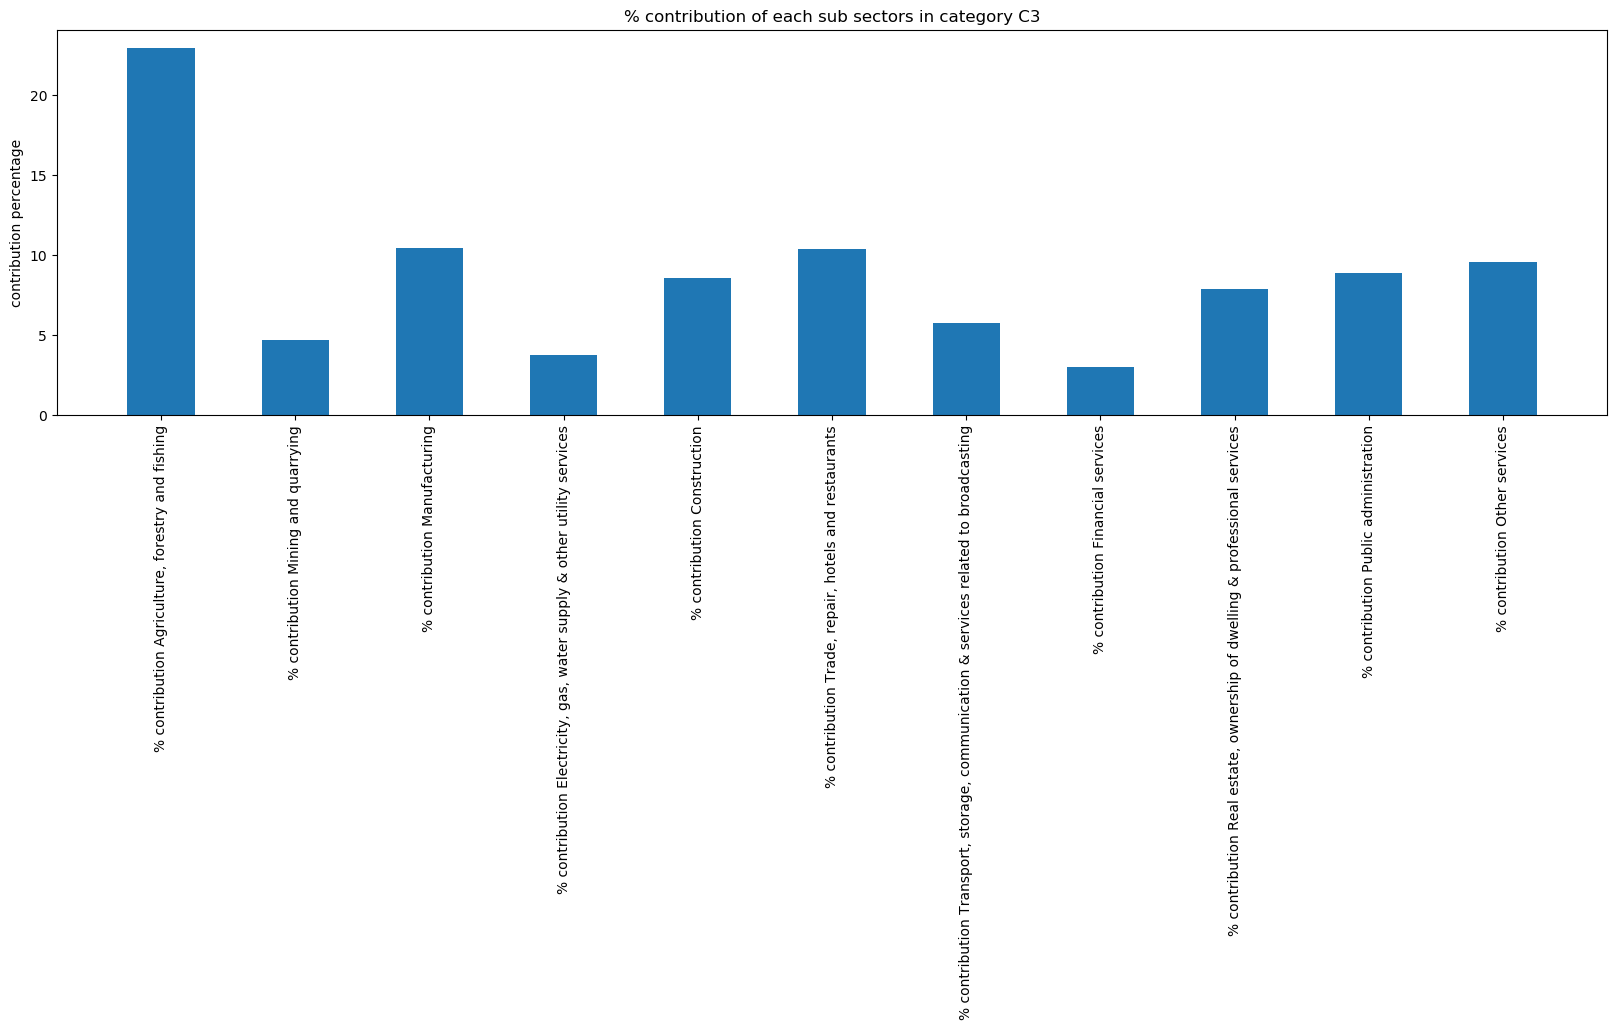

In [215]:
objects = value
y_pos = np.arange(len(objects))
performance = k

plt.figure(figsize=(20, 5))  # width:20, height:3
plt.bar(y_pos, performance, align='center', width=0.5)


plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('contribution percentage')
plt.title('% contribution of each sub sectors in category C3')

plt.show()

In [177]:
c4_df['% contribution Agriculture, forestry and fishing'] = 100 * (c4_df['Agriculture, forestry and fishing']/c4_df['Gross State Domestic Product'])
c4_df['% contribution Mining and quarrying'] = 100 * (c4_df['Mining and quarrying']/c4_df['Gross State Domestic Product'])
c4_df['% contribution Manufacturing'] = 100 * (c4_df['Manufacturing']/c4_df['Gross State Domestic Product'])
c4_df['% contribution Electricity, gas, water supply & other utility services'] = 100 * (c4_df['Electricity, gas, water supply & other utility services']/c4_df['Gross State Domestic Product'])
c4_df['% contribution Construction'] = 100 * (c4_df['Construction']/c4_df['Gross State Domestic Product'])
c4_df['% contribution Trade, repair, hotels and restaurants'] = 100 * (c4_df['Trade, repair, hotels and restaurants']/c4_df['Gross State Domestic Product'])
c4_df['% contribution Transport, storage, communication & services related to broadcasting'] = 100 * (c4_df['Transport, storage, communication & services related to broadcasting']/c4_df['Gross State Domestic Product'])
c4_df['% contribution Financial services'] = 100 * (c4_df['Financial services']/c4_df['Gross State Domestic Product'])
c4_df['% contribution Real estate, ownership of dwelling & professional services'] = 100 * (c4_df['Real estate, ownership of dwelling & professional services']/c4_df['Gross State Domestic Product'])
c4_df['% contribution Public administration'] = 100 * (c4_df['Public administration']/c4_df['Gross State Domestic Product'])
c4_df['% contribution Other services'] = 100 * (c4_df['Other services']/c4_df['Gross State Domestic Product'])

C:\Anaconda\envs\textsumm\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda\envs\textsumm\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda\envs\textsumm\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pand

In [179]:
c4_df[c4_df.columns[-11:]]

,"% contribution Agriculture, forestry and fishing",% contribution Mining and quarrying,% contribution Manufacturing,"% contribution Electricity, gas, water supply & other utility services",% contribution Construction,"% contribution Trade, repair, hotels and restaurants","% contribution Transport, storage, communication & services related to broadcasting",% contribution Financial services,"% contribution Real estate, ownership of dwelling & professional services",% contribution Public administration,% contribution Other services
2,19.4628,7.42637,10.1108,1.49717,8.75106,15.0792,6.03019,2.74435,7.13014,6.934,9.06449
3,21.2663,0.182143,5.85678,0.923107,9.22594,19.9197,8.4167,3.15047,10.0039,5.5578,12.2689
9,14.7902,9.38379,18.9498,1.55448,8.24401,9.17224,6.77095,2.53995,7.63118,5.01285,6.33517
12,33.6852,3.35775,9.06431,2.64098,9.13552,11.1156,5.94587,4.12629,5.51914,5.18136,5.70106
14,21.2351,NaN,2.74354,1.5236,7.9357,14.5737,6.08144,1.68018,8.83097,16.4652,17.6209
26,24.0545,0.864027,11.752,1.94622,10.7885,9.04495,7.09672,3.25126,13.9434,5.89639,4.82534


In [213]:
value = list(c4_df[c4_df.columns[-11:]].columns)
mean_contribution = c4_df[c4_df.columns[-11:]].mean(axis = 0)
k = mean_contribution.tolist()
mean_contribution

% contribution Agriculture, forestry and fishing                                       22.415690
% contribution Mining and quarrying                                                     4.242816
% contribution Manufacturing                                                            9.746210
% contribution Electricity, gas, water supply & other utility services                  1.680927
% contribution Construction                                                             9.013462
% contribution Trade, repair, hotels and restaurants                                   13.150897
% contribution Transport, storage, communication & services related to broadcasting     6.723646
% contribution Financial services                                                       2.915416
% contribution Real estate, ownership of dwelling & professional services               8.843120
% contribution Public administration                                                    7.507935
% contribution Other services 

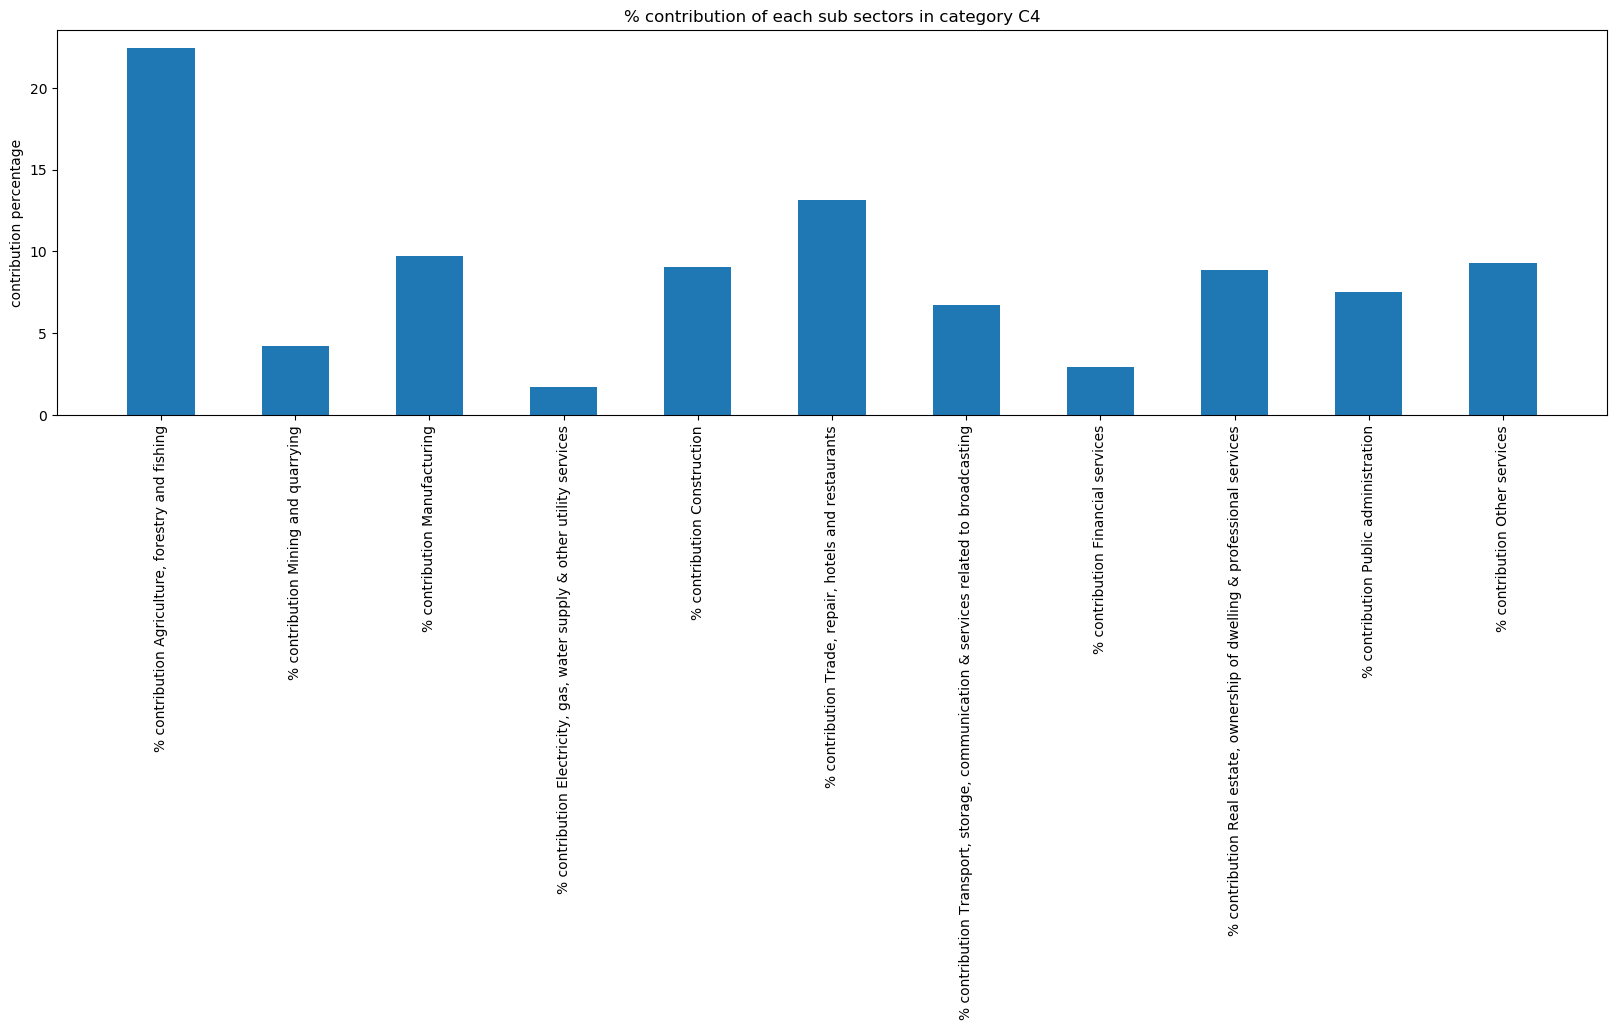

In [210]:
objects = value
y_pos = np.arange(len(objects))
performance = k

plt.figure(figsize=(20, 5))  # width:20, height:3
plt.bar(y_pos, performance, align='center', width=0.5)


plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('contribution percentage')
plt.title('% contribution of each sub sectors in category C4')

plt.show()

# Find the top 3/4/5 sub-sectors (such as agriculture, forestry and fishing, crops, manufacturing etc., not primary, secondary and tertiary) that contribute to approximately 80% of the GSDP of each category.

    C1 ---> Manufacturing, Agriculture, forestry and fishing and Real estate, ownership of dwelling & professional services
    C2 ---> Manufacturing, Agriculture, forestry and fishing and Real estate, ownership of dwelling & professional services
    C3 ---> Agriculture, forestry and fishing, Manufacturing and Trade, repair, hotels and restaurants
    C4 ---> Agriculture, forestry and fishing, Trade, repair, hotels and restaurants and Other services
    

# How does the GDP distribution of the top states (C1) differ from the others?
C1 states focuses more on manufacturing, Electricity, gas, water supply & other utility services and Construction, ie the secondary section more. But it still didn't ignore the primary sector as well. We can say there has been holistic development overall in C1 states thus have high GDP whereas the others especially the C3 and C4 states focus mainly on primary sector.

# Which sub-sectors seem to be correlated with high GDP?    
Sub-Sectors like manufacturing, Agriculture, forestry and fishing, Trade, repair, hotels and restaurants and Real estate, ownership of dwelling & professional services have the highest impact on GDP.

# Which sub-sectors do the various categories need to focus on? 
1. Category C1 needs to focus more on Mining and quarrying, Financial services and Agriculture, forestry and fishing
2. Category C2 needs to focus more on manufacturing, Mining and quarrying and Electricity, gas, water supply & other utility services
3. Category C3 needs to focus more on Manufacturing, Electricity, gas, water supply & other utility services and Financial services
4. Category C4 needs to focus more on Manufacturing, Electricity, gas, water supply & other utility services and Mining and quarrying

# Finally, provide at least two recommendations for each category to improve the per capita GDP.
    C1 ---> needs to focus more on Electricity, gas, water supply & other utility services renewable sources of energy.
            Population control is one of the key areas accross all the sectors

    C2 ---> needs to focus more on skilled workers that are required in the Secondary sector which will in turn increase the GDP.
            Population control is one of the key areas accross all the sectors.

    C3 ---> needs to shift focus from agriculture (primary sector) to secondary sectors like Financial services manufacturing etc.
            Population control is one of the key areas accross all the sectors.

    C4 ---> needs to shift focus from agriculture (primary sector) to secondary sectors like Financial services manufacturing etc.
            Also can look into Mining and quarrying sub-sector if they have resources they need to utilise them.
            Population control is one of the key areas accross all the sectors.